## Metadata


In our project, there are 58 features, and we need to use these features to predict the probability that a driver will file a claim next year. As we discussed in Phace 1, this has several implications, including but not limited to:

On the driver level: It can help drivers reduce unnecessary insurance costs and improve their rational insurance decision-making.
On the company level: It can help the company more accurately price its insurance products and better analyze the characteristics of its customers to improve its competitiveness in the industry.
On the development level: It can help the company narrow down the scope of its customer research, greatly reduce research costs, and increase research investments in elite customer characteristics, allowing for faster response to claims from new users, among other things.

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('F:/BaiduNetdiskDownload/WhaleDataScienceProject-master/train.csv')
test = pd.read_csv('F:/BaiduNetdiskDownload/WhaleDataScienceProject-master/test.csv')

In [2]:
# conbine test & train into full set

fullset = pd.concat([train,test],ignore_index=True)

define: role, category, level： 

```diff
- role
+ Lable every colums：Number|tag|features
```

```diff
- category
+ 1. ind return "individual"
+ 2. car return "car"
+ 3. calc return "calculated"
```


```diff
- level
+ 1. If the column name contains 'bin' or the column is the target, classify it as 'binary'. 
+ 2. if the column name contains 'cat' or the column is an ID, classify it as 'nominal'.
+ 3. if the data type is 'float', classify it as 'interval'. 
+ 4. if the data type is 'int', classify it as 'ordinal'. 


In [3]:
def meta(train,test,missing_values = -1,cols_ignore_missing = []):
    
    df = pd.concat([train,test]).reset_index(drop=True).fillna('未知')
    data = []
    for col in df.columns:
        # define role
        if col == 'target':
            role = 'target'
        elif col == 'id':
            role = 'id'
        else:
            role = 'feature'
        
        # define category
        if 'ind' in col:
            category = 'individual'
        elif 'car' in col:
            category = 'car'
        elif 'calc' in col:
            category = 'calculated'
        elif 'reg' in col:
            category = 'region'
        else:
            category = 'other'
        
        
        # define level of measurements
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif 'cat' in col[-3:] or col == 'id':
            level = 'nominal'
        elif df[col].dtype == 'float64' and df[col].replace(missing_values,np.nan).max()-df[col].replace(missing_values,np.nan).min() > 1:
            level = 'interval'
        elif df[col].dtype == 'float64' and df[col].replace(missing_values,np.nan).max()-df[col].replace(missing_values,np.nan).min() <= 1:
            level = 'ratio'
        elif df[col].dtype == 'int64':
            level = 'ordinal'
            
        # define data type
        dtype = df[col].dtype
        
        # define unique
        if col == 'id' or df[col].dtype == 'float64':
            uniq = 'Ignore'
        else:
            if col in cols_ignore_missing:
                uniq = df[col].nunique()
            else:
                uniq = df[col].replace({missing_values:np.nan}).nunique()
                
        # define cardinality
        if uniq == 'Ignore':
            cardinality = 'Ignore'
        elif uniq <= 10:
            cardinality = 'Low Cardinality'
        elif uniq <= 30:
            cardinality = 'Medium Cardinality'
        else:
            cardinality = 'High Cardinality'
        
        # define missing
        if col in cols_ignore_missing:
            missing = 0
        else:
            missing = sum(df[col] == missing_values)
            
        # define missing percent
        missing_percent = f'{missing}({round(missing*100/len(df),2)}%)'
        
        # define imputation
        if missing > df.shape[0]*0.4:
            imputation = 'remove'
        elif missing > 0:
            if level == 'binary' or level == 'nominal':
                imputation = ('mode')
            if level == 'ordinal':
                imputation = ('mode','median')
            if level == 'interval' or level == 'ratio':
                imputation = ('mode','median','mean')        
        else:
            imputation = "No Missing"
            
        # define keep
        keep = True
        if col  == 'id' or imputation == 'remove':
            keep = False
        col_dict = {
            'colname': col,
            'role': role,
            'category': category,
            'level': level,
            'dtype': dtype,
            'cardinality': uniq,
            'cardinality_level':cardinality,
            'missing': missing,
            'missing_percent': missing_percent,
            'imputation':imputation,
            'keep': keep,
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=list(col_dict.keys()))
    meta.set_index('colname', inplace=True)
    
    return meta

In [4]:
metadata = meta(train,test)

In [5]:
metadata

,role,category,level,dtype,cardinality,cardinality_level,missing,missing_percent,imputation,keep
colname,,,,,,,,,,
id,id,other,nominal,int64,Ignore,Ignore,0,0(0.0%),No Missing,False
target,target,other,binary,object,3,Low Cardinality,0,0(0.0%),No Missing,True
ps_ind_01,feature,individual,ordinal,int64,8,Low Cardinality,0,0(0.0%),No Missing,True
ps_ind_02_cat,feature,individual,nominal,int64,4,Low Cardinality,523,523(0.04%),mode,True
ps_ind_03,feature,individual,ordinal,int64,12,Medium Cardinality,0,0(0.0%),No Missing,True
ps_ind_04_cat,feature,individual,nominal,int64,2,Low Cardinality,228,228(0.02%),mode,True
ps_ind_05_cat,feature,individual,nominal,int64,7,Low Cardinality,14519,14519(0.98%),mode,True
ps_ind_06_bin,feature,individual,binary,int64,2,Low Cardinality,0,0(0.0%),No Missing,True
ps_ind_07_bin,feature,individual,binary,int64,2,Low Cardinality,0,0(0.0%),No Missing,True


In [6]:
metadata.groupby(['role','level']).size().reset_index(name = 'count')

,role,level,count
0,feature,binary,17
1,feature,interval,5
2,feature,nominal,14
3,feature,ordinal,16
4,feature,ratio,5
5,id,nominal,1
6,target,binary,1


In [7]:
# describe function
stats = fullset[metadata[metadata.dtype == 'float64'].index].describe()
stats

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06
mean,6.110305e-01,4.395943e-01,5.514848e-01,3.799519e-01,8.134878e-01,2.763614e-01,3.067355e+00,4.496817e-01,4.501073e-01,4.499718e-01
std,2.876763e-01,4.045123e-01,7.938159e-01,5.836187e-02,2.247024e-01,3.569623e-01,7.299510e-01,2.872071e-01,2.871817e-01,2.872136e-01
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.506191e-01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e-01,2.000000e-01,5.250000e-01,3.162278e-01,6.710052e-01,3.339162e-01,2.828427e+00,2.000000e-01,2.000000e-01,2.000000e-01
50%,7.000000e-01,3.000000e-01,7.211103e-01,3.741657e-01,7.660406e-01,3.687818e-01,3.316625e+00,4.000000e-01,5.000000e-01,5.000000e-01
75%,9.000000e-01,6.000000e-01,1.001561e+00,4.000000e-01,9.061429e-01,3.964846e-01,3.605551e+00,7.000000e-01,7.000000e-01,7.000000e-01
max,9.000000e-01,1.800000e+00,4.423517e+00,1.264911e+00,4.031301e+00,6.363961e-01,3.741657e+00,9.000000e-01,9.000000e-01,9.000000e-01


In [8]:
# variables with missing values

stats.columns[stats.loc['min'] == -1]

Index(['ps_reg_03', 'ps_car_12', 'ps_car_14'], dtype='object')

In [9]:
# Smallest standerd deviation

stats.loc['std'].nsmallest(1).index[0]

'ps_car_12'

In [10]:
# Variables maximum greater than 4

stats.columns[stats.loc['max'] > 4]

Index(['ps_reg_03', 'ps_car_13'], dtype='object')

<AxesSubplot:>

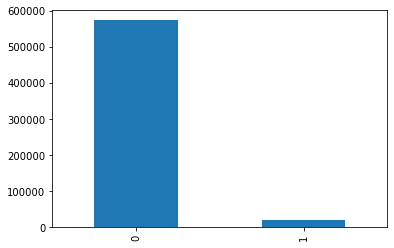

In [11]:
train.target.value_counts().plot(kind = 'bar')

In [14]:
import pandas as pd
import numpy as np
import colorama
from colorama import Fore, Style
from tabulate import tabulate

#from data_management import data_report

In [17]:
def data_report(train,test,metadata,verbose = False):
    
    fullset = pd.concat([train,test]).reset_index(drop=True).fillna('unknow')
    
    print(f"train total in rows：{Fore.RED}{train.shape[0]}{Style.RESET_ALL} | test total in rows：{Fore.BLUE}{test.shape[0]}{Style.RESET_ALL}")
    print(f"train total in columns：{Fore.RED}{train.shape[1]}{Style.RESET_ALL} | test total in columns：{Fore.BLUE}{test.shape[1]}{Style.RESET_ALL}")
    print(f"train in total：{train.size}")
    print(f"test in total：{test.size}")
    print('-'*50+ f"{Fore.RED}INFO{Style.RESET_ALL}"  + '-'*50)
    print('【train info】')
    train.info(verbose = verbose)
    print('-'*104)
    print('【test info】')
    test.info(verbose = verbose)
    
    if verbose:
    
        print('-'*48 + f"{Fore.RED}SUMMARY{Style.RESET_ALL}" + '-'*48)


        ############ SUMMARY #############
        print('*'*48 + f"{Fore.BLUE} COUNTS {Style.RESET_ALL}" + '*'*48)
        print('【Counts groupby role & level】'.upper())
        role_level_count = pd.DataFrame(
        {
            'count':metadata.groupby(['role','level']).size()
        }
        ).reset_index().sort_values(by = 'count',ascending=False)
        print(tabulate(role_level_count,tablefmt="grid",headers = ['role','level','count']))

        print('【Counts groupby role & category】'.upper())
        role_cate_count = pd.DataFrame(
        {
            'count':metadata.groupby(['role','category']).size()
        }
        ).reset_index().sort_values(by = 'count',ascending=False)
        print(tabulate(role_cate_count,tablefmt="grid",headers = ['role','category','count']))

        print('【Counts groupby role & cardinality_level】'.upper())
        role_cardinality_count = pd.DataFrame(
        {
            'count':metadata.groupby(['role','cardinality_level']).size()
        }
        ).reset_index().sort_values(by = 'count',ascending=False)
        print(tabulate(role_cardinality_count,tablefmt="grid",headers = ['role','cardinality_level','count']))


        print('*'*48 + f"{Fore.BLUE} MISSING {Style.RESET_ALL}" + '*'*48)
        print('【Cols to drop】'.upper())
        for col in metadata[metadata['keep'] == False].index:
            print(f" • {col}")

        print('【Cols to impute using (mode)】'.upper())
        for col in metadata[metadata['imputation'] == ('mode')].index:
            print(f" • {col}")

        print('【Cols to impute using (mode|median)】'.upper())
        for col in metadata[metadata['imputation'] == ('mode','median')].index:
            print(f" • {col}")

        print('【Cols to impute using (mode|median|mean)】'.upper())
        for col in metadata[metadata['imputation'] == ('mode','median','mean')].index:
            print(f" • {col}")

        print('*'*48 + f"{Fore.BLUE} CARDINALITY {Style.RESET_ALL}" + '*'*48)
        print('【Cols with medium cardinality】 ==> '.upper()+f'{Fore.YELLOW}PLEASE TAKE CARE OF USING ONEHOT-ENCODING{Style.RESET_ALL}')
        for col in metadata[metadata['cardinality_level'] == 'Medium Cardinality'].index:
            print(f" • {col}")

        print('【Cols with High cardinality】 ==> '.upper()+f'{Fore.YELLOW}PLEASE APPLY TARGET-ENCODING{Style.RESET_ALL}')
        for col in metadata[metadata['cardinality_level'] == 'High Cardinality'].index:
            print(f" • {Fore.GREEN}{col}{Style.RESET_ALL}")


        print('-'*42 + f"{Fore.RED}DESCRIPTIVE ANALYSIS{Style.RESET_ALL}" + '-'*42)
        conti_descrip = fullset[metadata[metadata['level'].isin(['interval','ratio'])].index].describe()
        print(tabulate(conti_descrip.T,tablefmt="grid",headers = conti_descrip.T.columns))

        print('-'*50 + f"{Fore.RED}META{Style.RESET_ALL}" + '-'*50)
        cols = ['role','category', 'level', 'dtype','cardinality', 'missing_percent','keep']
        print(tabulate(metadata[cols],tablefmt="grid",headers = cols))

In [18]:
data_report(train,test,metadata,verbose=True)

train total in rows：595212 | test total in rows：892816
train total in columns：59 | test total in columns：58
train in total：35117508
test in total：51783328
--------------------------------------------------INFO--------------------------------------------------
【train info】
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin